In [1]:
import pandas as pd

In [3]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']

In [4]:
adult_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [5]:
cat_adult_data = adult_data.select_dtypes(include=['object'])

In [6]:
cat_adult_data.sample(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
75,Private,HS-grad,Never-married,Other-service,Own-child,White,Male,Mexico,<=50K
10817,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
16948,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
1005,Private,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,<=50K
1815,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,Black,Male,United-States,<=50K
4502,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
14352,Private,Bachelors,Married-spouse-absent,Adm-clerical,Not-in-family,White,Female,Cuba,<=50K
18384,?,9th,Divorced,?,Unmarried,White,Female,Cuba,<=50K
19838,Self-emp-not-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,<=50K
12172,Private,Bachelors,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,?,<=50K


In [7]:
cat_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native-country  32561 non-null  object
 8   Salary          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [9]:
cat_adult_data.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
for col in cat_adult_data.columns:
    cat_adult_data[col] = cat_adult_data[col].str.strip()

/Users/7000020487/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
for col in cat_adult_data.columns:
    print(cat_adult_data[col].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

In [14]:
cat_adult_data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [15]:
cat_adult_data[cat_adult_data['native-country'] == '?']

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
14,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,?,>50K
38,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,?,>50K
51,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,?,<=50K
61,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,?,<=50K
93,Private,HS-grad,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,?,<=50K
...,...,...,...,...,...,...,...,...,...
32449,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,?,>50K
32469,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,?,<=50K
32492,Self-emp-not-inc,HS-grad,Divorced,Sales,Own-child,White,Male,?,<=50K
32510,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,?,>50K


In [17]:
useful_cat_adult_data = cat_adult_data[~((cat_adult_data['native-country'] == '?') & (cat_adult_data['workclass'] == '?') & (cat_adult_data['occupation'] == '?'))]

In [18]:
useful_cat_adult_data.sample(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
30861,Private,HS-grad,Never-married,Machine-op-inspct,Other-relative,White,Male,United-States,<=50K
18467,Private,11th,Separated,Other-service,Unmarried,Black,Female,United-States,<=50K
23684,Private,Bachelors,Never-married,Tech-support,Own-child,White,Male,United-States,<=50K
11774,State-gov,12th,Married-civ-spouse,Other-service,Wife,White,Female,United-States,<=50K
18766,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States,<=50K
12608,Private,9th,Divorced,Prof-specialty,Not-in-family,Black,Female,United-States,<=50K
5046,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
11571,Private,10th,Never-married,Other-service,Own-child,Black,Male,United-States,<=50K
25390,Private,Assoc-voc,Never-married,Tech-support,Own-child,White,Female,United-States,<=50K
1303,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K


In [19]:
useful_cat_adult_data.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [20]:
def f(c):
    if c in ['HS-grad','11th','9th','7th-8th','5th-6th', '10th', '1st-4th', 'Preschool', '12th']:
        return 'school-dropout'
    elif c in ['Bachelors','Some-college','Assoc-acdm', 'Assoc-voc']:
        return 'Educated'
    else:
        return 'Highly Educated'
useful_cat_adult_data['education_cat'] = useful_cat_adult_data.education.map(f)

/Users/7000020487/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
useful_cat_adult_data['education_cat'].unique()

array(['Educated', 'school-dropout', 'Highly Educated'], dtype=object)

In [33]:
def func(r):
    if (r['education_cat'] == 'school-dropout') and (r['Salary'] == '>50K'):
        return True
    else:
        return False
useful_cat_adult_data['Lucky'] = useful_cat_adult_data.apply(func, axis=1)

/Users/7000020487/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
useful_cat_adult_data[useful_cat_adult_data.Lucky == True]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary,education_cat,Lucky
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,school-dropout,True
67,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,>50K,school-dropout,True
84,Private,HS-grad,Divorced,Craft-repair,Not-in-family,White,Female,United-States,>50K,school-dropout,True
86,Local-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K,school-dropout,True
105,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K,school-dropout,True
...,...,...,...,...,...,...,...,...,...,...,...
32462,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K,school-dropout,True
32510,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,?,>50K,school-dropout,True
32518,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K,school-dropout,True
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,school-dropout,True


In [35]:
num_adult_data = adult_data.select_dtypes(exclude=['object'])

In [36]:
num_adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
import matplotlib.pyplot as plt

In [41]:
adult_data.Salary = adult_data.Salary.str.strip()
adult_data.Salary = adult_data.Salary.map({'<=50K':0, '>50K':1})

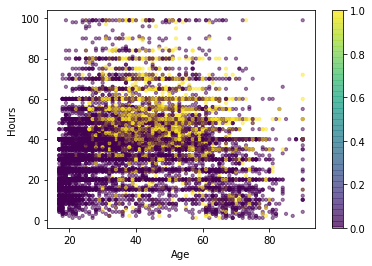

In [42]:
plt.scatter(x=adult_data.age,y=adult_data['hours-per-week'], c=adult_data.Salary ,s=10, alpha=.5)
plt.xlabel('Age')
plt.ylabel('Hours')
plt.colorbar()

In [43]:
gap_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/gapminder-FiveYearData.csv')

In [44]:
gap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [46]:
gap_data.pivot_table(index='country',columns='year',values='pop', aggfunc='sum')

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,8425333.0,9240934.0,10267083.0,11537966.0,13079460.0,14880372.0,12881816.0,13867957.0,16317921.0,22227415.0,25268405.0,31889923.0
Albania,1282697.0,1476505.0,1728137.0,1984060.0,2263554.0,2509048.0,2780097.0,3075321.0,3326498.0,3428038.0,3508512.0,3600523.0
Algeria,9279525.0,10270856.0,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142.0,33333216.0
Angola,4232095.0,4561361.0,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106.0,12420476.0
Argentina,17876956.0,19610538.0,21283783.0,22934225.0,24779799.0,26983828.0,29341374.0,31620918.0,33958947.0,36203463.0,38331121.0,40301927.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,26246839.0,28998543.0,33796140.0,39463910.0,44655014.0,50533506.0,56142181.0,62826491.0,69940728.0,76048996.0,80908147.0,85262356.0
West Bank and Gaza,1030585.0,1070439.0,1133134.0,1142636.0,1089572.0,1261091.0,1425876.0,1691210.0,2104779.0,2826046.0,3389578.0,4018332.0
Yemen Rep.,4963829.0,5498090.0,6120081.0,6740785.0,7407075.0,8403990.0,9657618.0,11219340.0,13367997.0,15826497.0,18701257.0,22211743.0
